In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
from numpy import pi
from math   import sin

def function_dist(n,x):
    qc = QuantumCircuit(n)
    S = np.zeros(n)
    for i in range (n):
        S[i] = sin(x*2**i)
    return S
        

def Calc_Fn(n,S,Rn):
    qc = QuantumCircuit(n*2)
    Fn = function_dist(n,Rn)
    for i in range (n):
        qc.h(2*i)
        qc.rz(S[i],2*i)
        qc.rz(-Fn[i],2*i)
        qc.ry(-3.14159/2,2*i)
        qc.h(2*i+1)
        qc.rz(S[i],2*i+1)
        qc.rz(-Fn[i],2*i+1)
        qc.rx(-3.14159/2, 2*i+1)
    return qc



Rn = 2*pi
x = Rn
n = 8
S = function_dist(n,x)
qc = Calc_Fn(n,S,Rn)
qc.draw('mpl')

#if n <= 4:
# Obtener el estado inicial del qubit
#state = Statevector.from_instruction(qc)
# Graficar la esfera de Bloch
#plot_bloch_multivector(state)



TypeError: function_dist() takes 2 positional arguments but 3 were given

In [ ]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from itertools import product

n = n*2
#combinations = list(product('IZ', repeat=n))
#operator_strings = [Pauli(''.join(comb)) for comb in combinations] #['Z' * i + 'Z' + 'I' *(n-1-i) for i in range(n-1)]
operator_strings = ['I' * i + 'Z' + 'I' *(n-1-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]
#print(operators)

['ZIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIZI']
15


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_kyoto"
backend = QiskitRuntimeService().get_backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)

operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


C:\Users\mpaur\AppData\Local\Temp\ipykernel_12696\4116969614.py:5: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = QiskitRuntimeService().get_backend(backend_name)


In [ ]:
from qiskit_ibm_runtime import Estimator as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled , operators_transpiled_list)])

job_id = job.job_id()

print(job_id)


cv9ky60sgfsg008edpxg


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


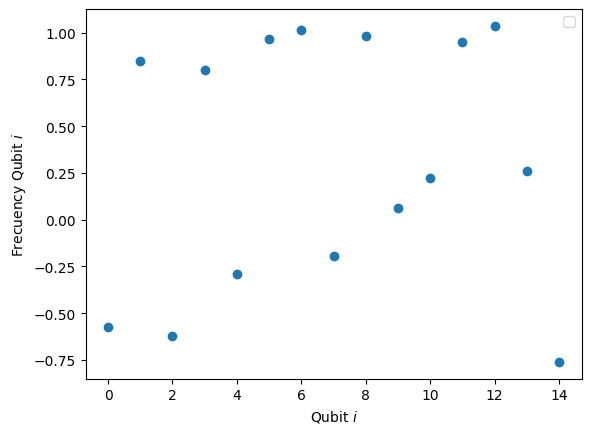

In [ ]:
import matplotlib.pyplot as plt


data = list(range(0, len(operators)))
result = job.result()[0]
values = result.data.evs
values = [v for v in values]

print(result.metadata)

plt.scatter(data, values, marker ='o')
plt.xlabel('Qubit $i$')
plt.ylabel(r'Frecuency Qubit $i$')
plt.legend()
plt.show()

